<a href="https://colab.research.google.com/github/Fraz-Rasool/Loan-Eligibility-Approval/blob/master/Loan_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [9]:
df = pd.read_csv("LoanApprovalPrediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [11]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [12]:
print(df.columns.tolist())

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


<Axes: >

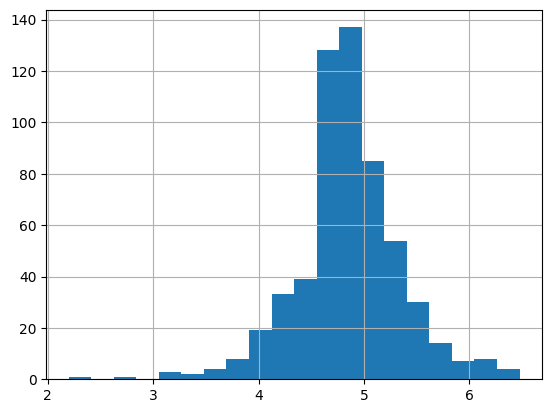

In [13]:
df['loan_amount_log'] = np.log(df['LoanAmount'])
df['loan_amount_log'].hist(bins=20)

<Axes: >

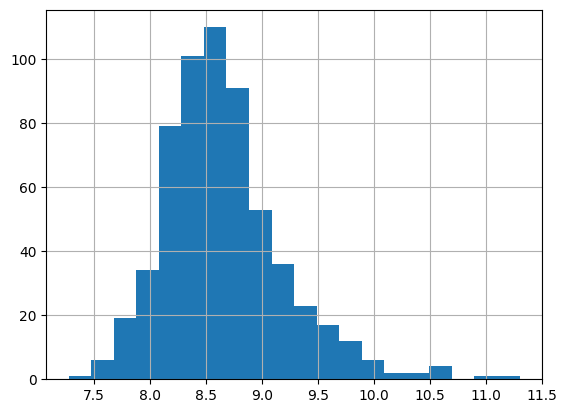

In [14]:
df['Total_income'] = np.log(df['ApplicantIncome'] + df['CoapplicantIncome'])
df['Total_income'].hist(bins=20)

In [15]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loan_amount_log = df.loan_amount_log.fillna(df.loan_amount_log.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isnull().sum()

<ipython-input-15-d35ae1f40d3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
<ipython-input-15-d35ae1f40d3c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [16]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values
x

array([['Male', 'No', 0.0, ..., 1.0, 4.850145095517304,
        8.674025985443025],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425,
        8.006367567650246],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587,
        8.933664178700935],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [17]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y

In [18]:
print("Percentage of missing gender is: %.2f%%" % ((df['Gender'].isnull().sum() / df.shape[0]) * 100))

Percentage of missing gender is: 0.00%


No of people who take loan as grouped by gneder: 
Gender
Male      487
Female    111
Name: count, dtype: int64


<ipython-input-19-470d12107a22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Gender" , data = df, palette = 'Set1')


<Axes: xlabel='Gender', ylabel='count'>

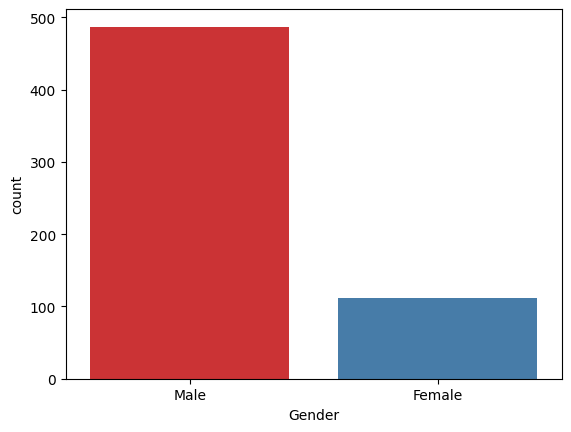

In [19]:
print("No of people who take loan as grouped by gneder: ")
print(df['Gender'].value_counts())
sns.countplot(x = "Gender" , data = df, palette = 'Set1')

No of people who take loan as grouped by martial status: 
Married
Yes    388
No     210
Name: count, dtype: int64


<ipython-input-20-1ff9527bb597>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Married" , data = df, palette = 'Set1')


<Axes: xlabel='Married', ylabel='count'>

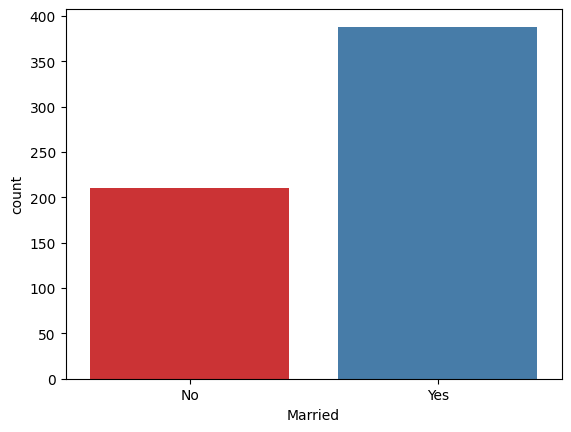

In [20]:
print("No of people who take loan as grouped by martial status: ")
print(df['Married'].value_counts())
sns.countplot(x = "Married" , data = df, palette = 'Set1')

No of people who take loan as grouped by dependent: 
Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64


<ipython-input-21-0db74db262d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Dependents" , data = df, palette = 'Set1')


<Axes: xlabel='Dependents', ylabel='count'>

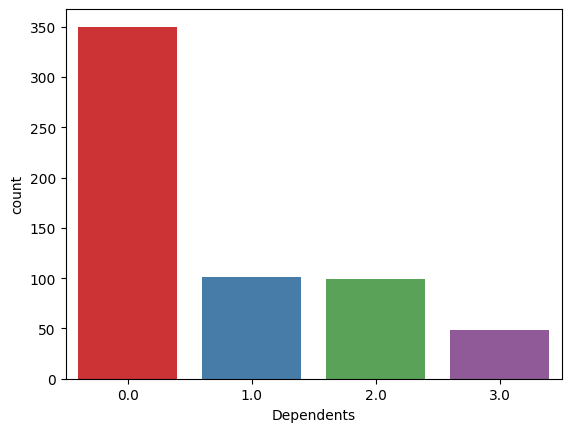

In [21]:
print("No of people who take loan as grouped by dependent: ")
print(df['Dependents'].value_counts())
sns.countplot(x = "Dependents" , data = df, palette = 'Set1')

No of people who take loan as grouped by self employed: 
Self_Employed
No     488
Yes    110
Name: count, dtype: int64


<ipython-input-22-668fa22c1a6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Self_Employed" , data = df, palette = 'Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

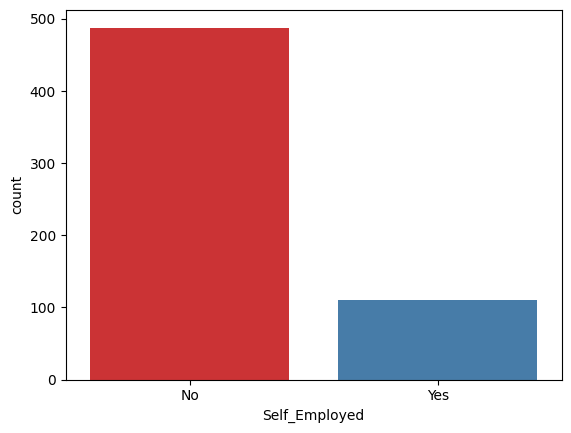

In [22]:
print("No of people who take loan as grouped by self employed: ")
print(df['Self_Employed'].value_counts())
sns.countplot(x = "Self_Employed" , data = df, palette = 'Set1')

No of people who take loan as grouped by loan amount: 
LoanAmount
144.968804    21
120.000000    20
110.000000    16
100.000000    15
187.000000    12
              ..
72.000000      1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 200, dtype: int64


<ipython-input-23-9f15810337e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "LoanAmount" , data = df, palette = 'Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

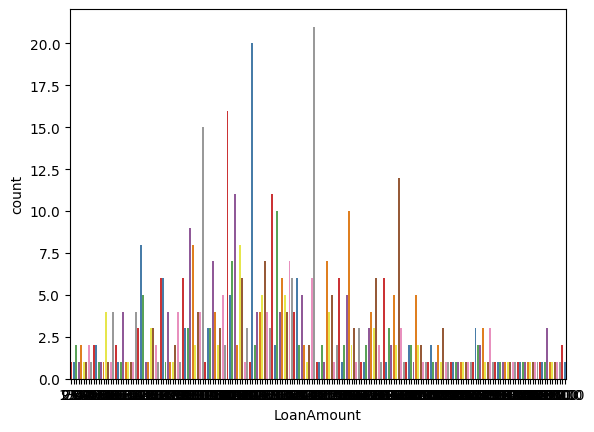

In [23]:
print("No of people who take loan as grouped by loan amount: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x = "LoanAmount" , data = df, palette = 'Set1')

No of people who take loan as grouped by credit history: 
Credit_History
1.0    512
0.0     86
Name: count, dtype: int64


<ipython-input-24-c5ceb634b591>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Credit_History" , data = df, palette = 'Set1')


<Axes: xlabel='Credit_History', ylabel='count'>

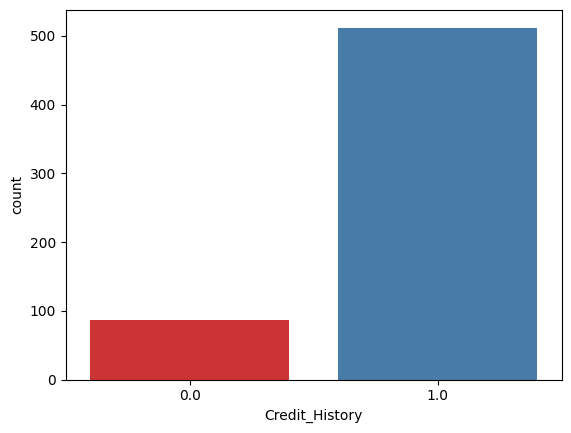

In [24]:
print("No of people who take loan as grouped by credit history: ")
print(df['Credit_History'].value_counts())
sns.countplot(x = "Credit_History" , data = df, palette = 'Set1')

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 0)
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [26]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()
for i in range(0, 5):
    X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i])
    X_train[:, 7] = Labelencoder_x.fit_transform(X_train[:, 7])
X_train

array([[1, 1, 2, ..., 1.0, 5.10594547390058, 399],
       [0, 0, 0, ..., 0.0, 4.634728988229636, 188],
       [1, 1, 1, ..., 1.0, 5.147494476813453, 321],
       ...,
       [1, 0, 0, ..., 0.0, 4.820281565605037, 197],
       [0, 0, 0, ..., 1.0, 4.787491742782046, 121],
       [1, 1, 2, ..., 1.0, 5.616771097666572, 419]], dtype=object)

In [27]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [28]:
for i in range (0,5):
  X_test[:,i]= Labelencoder_x.fit_transform(X_test[:,i])
  X_test[:,7]= Labelencoder_x.fit_transform(X_test[:,7])
X_test

array([[1, 0, 0, 0, 6, 1.0, 6.476972362889683, 114],
       [0, 0, 0, 0, 5, 1.0, 4.969813299576001, 72],
       [1, 1, 0, 0, 0, 1.0, 4.709530201312334, 87],
       [0, 0, 0, 0, 5, 1.0, 4.0943445622221, 8],
       [1, 1, 0, 0, 3, 1.0, 3.7376696182833684, 18],
       [1, 1, 0, 1, 5, 0.0, 5.0238805208462765, 80],
       [1, 0, 0, 0, 3, 1.0, 4.787491742782046, 98],
       [1, 0, 0, 1, 5, 1.0, 4.836281906951478, 43],
       [1, 1, 0, 0, 5, 1.0, 4.68213122712422, 57],
       [1, 1, 2, 0, 5, 1.0, 5.075173815233827, 78],
       [1, 1, 0, 0, 4, 1.0, 5.1647859739235145, 107],
       [1, 0, 0, 0, 5, 1.0, 4.976733742420574, 32],
       [1, 0, 0, 1, 3, 1.0, 4.0943445622221, 3],
       [1, 1, 2, 0, 5, 1.0, 5.231108616854587, 88],
       [1, 1, 0, 0, 5, 0.0, 4.77912349311153, 65],
       [1, 1, 3, 1, 5, 1.0, 5.153291594497779, 29],
       [0, 0, 0, 1, 5, 1.0, 4.787491742782046, 38],
       [1, 0, 0, 0, 5, 1.0, 4.941642422609304, 75],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 34],
       [1, 1, 0

In [29]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
from sklearn import metrics
y_prediction = rf_clf.predict(X_test)
print("Accuracy of random forest classifier is ", metrics.accuracy_score(y_prediction,y_test))
y_prediction

Accuracy of random forest classifier is  0.7666666666666667


array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [38]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [39]:
y_prediction = nb_clf.predict(X_test)
print("Accuracy of bayes classifier is: ",metrics.accuracy_score(y_prediction,y_test))

Accuracy of bayes classifier is:  0.8083333333333333


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_prediction = dt_clf.predict(X_test)
print("Accuracy of decision tree classifier is: ",metrics.accuracy_score(y_prediction,y_test))

Accuracy of decision tree classifier is:  0.6666666666666666


In [42]:
y_prediction

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_prediction = knn_clf.predict(X_test)
print("Accuracy of knn classifier is: ",metrics.accuracy_score(y_prediction,y_test))

Accuracy of knn classifier is:  0.8166666666666667
